# Chapter 17: Reasoning Techniques

이 장에서는 지능형 에이전트를 위한 **고급 추론 방법론**을 다루며, 특히 **다단계 논리 추론**과 **문제 해결**에 초점을 맞춘다.     
이 패턴은 단순한 순차적 연산을 넘어서 에이전트의 **내부 추론 과정**을 명시적으로 드러나게 한다.   
에이전트는 문제를 더 작은 단위로 나누고, 중간 단계를 고려하며, 더 **견고하고 정확한 결론**에 도달할 수 있다.

이러한 고급 기법들의 핵심 원리는 **추론(inference) 과정에서 더 많은 계산 자원을 할당하는 것**이다.     
이는 질의를 처리하고 응답을 생성하는 동안 에이전트(또는 그 기반이 되는 LLM)에게 **더 많은 처리 시간이나 단계 수를 부여한다**는 의미다.    


빠르게 한 번만 처리하는 단일 패스(single pass) 방식 대신, 에이전트는 다음과 같은 방식을 사용할 수 있다.


- **반복적인 개선 (iterative refinement)** 을 수행하고,
- **여러 해결 경로(multiple solution paths)** 를 탐색하며,
- **외부 도구(external tools)** 를 활용한다.

추론 과정에 더 많은 시간을 들이는 방식은, 특히 **더 깊은 분석과 숙고가 필요한 복잡한 문제**에서 **정확성, 일관성, 견고성**을 크게 향상시키는 경우가 많다.

## Practical Applications & Use Cases

- **Complex Question Answering (복잡한 질의 응답)**  
  다양한 데이터 소스로부터 정보를 통합하고 논리적 추론을 수행해야 하는 **멀티홉 질의**를 해결하는 데 활용된다.     
  이 과정에서 여러 개의 추론 경로를 탐색할 수 있으며, **추론 시간(inference time)을 늘려** 정보를 더 잘 종합하고 정교한 답변을 생성할 수 있다.

- **Mathematical Problem Solving (수학 문제 해결)**  
  수학 문제를 더 작은 단위의 **부분 문제들로 분해**하고, 단계별 풀이 과정을 명시적으로 보여주며,     
  **코드 실행**을 통해 정확한 계산을 수행할 수 있게 한다.     
  추론 시간을 충분히 부여하면 더 복잡한 코드를 생성·검증할 수 있어, 난도가 높은 수학 문제에도 대응할 수 있다.

- **Code Debugging and Generation (코드 디버깅 및 생성)**  
  에이전트가 코드를 생성하거나 수정할 때, **그렇게 판단한 이유(추론 과정)** 를 설명하도록 지원한다.    
  잠재적인 버그나 문제 지점을 순차적으로 짚어 나가고, **테스트 결과를 바탕으로 코드를 반복적으로 개선(Self-Correction)** 한다.    
  충분한 추론 시간은 이러한 **디버깅 사이클을 더 철저하게 수행**하는 데 기여한다.    

- **Strategic Planning (전략적 계획 수립)**  
  여러 옵션, 결과, 선행조건들을 두고 **비교·검토하는 추론 과정**을 통해 종합적인 계획을 수립하도록 돕는다.     
  또한 **실시간 피드백을 반영해 계획을 수정하는 ReAct 스타일의 접근**과 잘 맞물린다.    
  추론에 더 많은 시간을 할당하면 **더 효과적이고 신뢰할 수 있는 계획**을 도출할 수 있다.     

- **Medical Diagnosis (의료 진단 보조)**  
  에이전트가 환자의 **증상, 검사 결과, 병력** 등을 체계적으로 평가하여 진단에 도달하도록 돕는다.     
  각 단계에서 어떤 이유로 그런 판단을 내렸는지 **추론 과정을 서술**할 수 있으며, 필요한 경우 **외부 도구를 활용해 추가 데이터를 조회(ReAct)** 할 수 있다.     
  추론 시간이 늘어날수록 **감별 진단(differential diagnosis)을 더 폭넓고 깊이 있게 수행**할 수 있다.    

- **Legal Analysis (법률 분석)**  
  법률 문서와 판례를 분석하여 **논리적인 법적 주장이나 조언을 구성**하는 데 활용된다.     
  이때 어떤 논리적 단계를 거쳐 결론에 도달했는지를 상세히 기술하고, **자기 점검(Self-Correction)** 을 통해 논리적 일관성을 보장한다.     
  추론 시간을 늘리면 **더 깊이 있는 법률 리서치와 논증 구성**이 가능해진다.

## Reasoning Techniques (추론 기법)

### Chain-of-Thought ( CoT )
**Chain-of-Thought(CoT) 프롬프트**는 단계별 사고 과정을 모사함으로써 LLM의 **복잡한 추론 능력**을 크게 향상시킨다

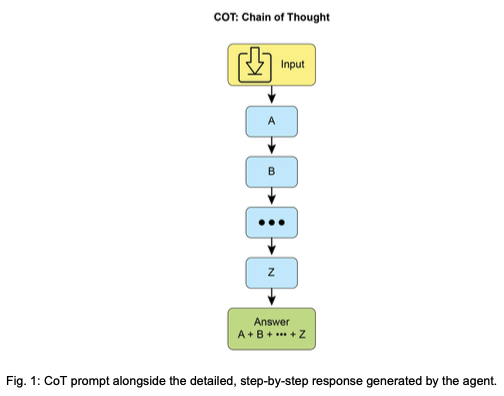

CoT 프롬프트는 직접적인 정답만 요구하는 대신, 모델이 **중간 추론 단계를 순차적으로 생성**하도록 유도한다.     
명시적 분해 과정은 LLM을 복잡한 문제를 더 작고 다루기 쉬운 **하위 문제들로 분해**해서 문제를 해결하게 만든다.    
그래서 **다단계 추론이 필요한 작업(산술, 상식 추론, 기호 조작)**에서 모델의 성능을 끌어올린다.    

#### 어려운 단일 단계 문제를 여러 개의 더 단순한 단계로 변환
이런 접근은 정확도를 높일 뿐 아니라, 모델이 어떻게 결론에 도달했는지를 보여 주기 때문에 **디버깅과 이해(해석 가능성)에 매우 유용**하다.    

CoT의 효과는 모델의 내부 처리 과정을 **더 숙고적이고 논리적인 진행 방식으로 유도**한다는 점에서 나온다.     
그 결과 Chain-of-Thought는 **현대 LLM에서 고급 추론 능력을 가능하게 하는 핵심 기법**으로 자리 잡았다.    
복잡한 문제를 **관리 가능한 하위 문제들로 분해하고, 추론 과정을 투명하게 만드는 특성**은 특히 자율 에이전트에게 중요하다.    
이를 통해 에이전트는 **복잡한 환경에서 더욱 신뢰할 수 있고 감사(audit) 가능한 행동**을 수행할 수 있기 때문이다.

CoT는 단계별 추론을 보여 주는 **few-shot 예시를 제공**하거나, 단순히 모델에게 `"단계별로 생각해 봐"`라고 지시하는 것만으로도 구현할 수 있다.    

아래는 해당 예시 프롬프트와 CoT 추론 과정을 그대로 나타낸 코드이다.

---


```python
당신은 정보 검색(Information Retrieval) 에이전트입니다.
당신의 목표는 사용자의 질문에 대해 **단계별로 깊이 생각하며**,
가능한 한 포괄적이고 정확한 답변을 제공하는 것입니다.

아래 과정을 반드시 따르십시오:

1. **질의 분석(Analyze the Query):**  
   사용자의 질문에서 핵심 주제와 구체적인 요구사항을 파악하세요.  
   주요 개체, 키워드, 요청된 정보의 유형을 식별합니다.

2. **검색 질의 구성(Formulate Search Queries – 지식 베이스용):**  
   분석 결과를 바탕으로, 지식 베이스나 외부 도구에서  
   관련 정보를 찾기 위해 사용할 **정확한 검색 쿼리 목록**을 만드세요.

3. **정보 검색 시뮬레이션(Simulate Information Retrieval – 자기 수정/추론 단계):**  
   각 검색 쿼리에 대해, 실제로 검색을 수행했다고 가정하고  
   어떤 종류의 정보를 얻게 될지 **머릿속으로 상상**해 보세요.  
   가장 관련성 높은 스니펫은 무엇일지, 애매하거나 빠져 있을 수 있는 부분은 무엇일지 생각해 봅니다.

4. **정보 종합(Synthesize Information):**  
   시뮬레이션한 검색 결과와 사용자의 원래 질문에 대한 이해를 바탕으로,  
   수집된 정보를 하나의 **일관되고 완전한 답변**으로 통합하세요.  
   질문의 모든 측면이 빠짐없이 다뤄졌는지 확인합니다.

5. **검토 및 정제(Review and Refine):**  
   최종 답변을 내기 전에, 비판적으로 다시 검토하세요.  
   - 정확한가?  
   - 충분히 포괄적인가?  
   - 이해하기 쉬운가?  
   - 불필요하게 장황하지는 않은가?  
   개선할 점이 있다면 무엇을 어떻게 고칠지 스스로 지정하고, 답변을 다듬으세요.

---

**사용자 질의(User Query):**  
"고전 컴퓨터와 양자 컴퓨터의 주요 차이점을 설명하고, 양자 컴퓨팅의 잠재적인 활용 사례를 간단히 설명해줘."

---

**에이전트의 사고 과정 (Internal Tree-of-Thought / CoT Output – 프롬프트에 의해 유도됨):**

**생각 1 (질의 분석 – Analyze Query):**
사용자가 원하는 것은 두 가지다:
1. 고전(클래식) 컴퓨터와 양자 컴퓨터의 **주요 차이점** 설명  
2. 양자 컴퓨팅의 **잠재적인 활용 사례를 하나 간단히 설명**

핵심 키워드:
- classical computers(고전 컴퓨터)
- quantum computers(양자 컴퓨터)
- differences(차이점)
- potential application(잠재적 응용/활용 사례)

질문의 타입:
- 개념 비교(고전 vs 양자)
- 응용 사례에 대한 간단한 설명(한두 문단 정도)

---

**생각 2 (검색 질의 구성 – Formulate Search Queries):**
지식 베이스나 웹에서 검색한다면 다음과 같은 쿼리를 사용할 것이다:

- "differences between classical and quantum computers"
- "classical computer vs quantum computer bits qubits"
- "how classical computers work transistors"
- "how quantum computers work superposition entanglement"
- "applications of quantum computing drug discovery cryptography optimization"

---

**생각 3 (정보 검색 시뮬레이션 & 핵심 개념 도출 – Simulate Retrieval):**
각 쿼리에서 기대할 수 있는 정보:

- **"differences between classical and quantum computers"**  
  → 비트(bits) vs 큐비트(qubits)  
  → 고전 컴퓨터: 0 또는 1, 이진 상태  
  → 양자 컴퓨터: 중첩(superposition), 얽힘(entanglement)  
  → 특정 문제에서의 계산 복잡도 차이(일부 문제에서 양자 우위)

- **"how classical computers work transistors"**  
  → 트랜지스터, 논리 게이트, 순차적(squential) 또는 병렬적 처리  
  → 결정론적(deterministic) 계산

- **"how quantum computers work superposition entanglement"**  
  → 큐비트는 0과 1 상태의 **중첩(superposition)** 가능  
  → 여러 큐비트가 **얽힘(entanglement)** 상태를 이룰 수 있음  
  → 전체 상태 공간이 2^n 차원으로 폭발적으로 증가

- **"applications of quantum computing"**  
  → 암호 해독(예: Shor 알고리즘, 큰 수 소인수분해)  
  → 최적화 문제(물류, 포트폴리오, 경로 최적화 등)  
  → 물질/재료 시뮬레이션, 화학/약물 설계(분자 수준 시뮬레이션)  
  → 머신러닝 가속 등의 후보

잠재적 애매함:
- “정말 모든 문제에서 양자가 더 빠른가?” → 아니다, **특정 유형의 문제**에서만 이점  
- 너무 기술적인 수식보다는, 사용자가 이해하기 쉽게 **직관적인 차이** 위주로 설명해야 함  
- 응용 사례는 한 가지를 골라 **짧고 명확하게** 설명하는 것이 좋음 (예: 약물 설계/신약 개발)

---

**생각 4 (정보 종합 – Synthesize Information):**

구성 아이디어:

1. **고전 컴퓨터 설명:**  
   - 비트(0 또는 1)  
   - 트랜지스터/논리 게이트 기반  
   - 일반적인 순차적 계산 방식

2. **양자 컴퓨터 설명:**  
   - 큐비트(0, 1 상태의 중첩 가능)  
   - 중첩과 얽힘 덕분에 다수의 상태를 동시에 표현  
   - 특정 문제에 대해 고전 컴퓨터와는 다른 계산 패러다임 제공

3. **주요 차이점 정리:**  
   - 비트 vs 큐비트  
   - 결정론적 vs 확률적/양자역학적 특성  
   - 모든 문제에서 우위가 아니라, 특정 문제에서 잠재적 지수적 속도 향상

4. **잠재적 활용 사례 하나 선택 (예: 신약 개발):**  
   - 분자 구조, 상호작용을 양자 수준에서 시뮬레이션  
   - 고전 컴퓨터로는 계산량이 너무 커서 어려운 문제를  
     양자 컴퓨터가 더 효율적으로 다룰 수 있는 가능성  
   - 결과적으로 **신약 후보 탐색과 개발 속도 향상**이라는 스토리로 설명

문장 스타일:
- 너무 기술적인 표현보다는, 개념 차이를 직관적으로 설명  
- 응용 사례는 한 문단 정도로 간단히  
- 전체 길이는 한두 단락 + 응용 사례 단락 정도로 구성

---

**생각 5 (검토 및 정제 – Review and Refine):**

체크 리스트:
- 차이점이 명확히 드러나는가?  
  - 비트 vs 큐비트, 중첩, 얽힘, 계산 방식 차이 → 포함 예정
- “양자 컴퓨터가 모든 면에서 우월하다”는 오해를 줄였는가?  
  - “특정 문제에서” 더 유리하다고 표현할 것
- 응용 사례는 하나로 충분히 명확한가?  
  - 신약 개발(Drug Discovery)로 선정
- 길이와 난이도는 적절한가?  
  - 너무 장황하지 않고, 비전공자도 대략 이해할 수 있도록

필요한 수정:
- 용어를 소개할 때, 영어 용어도 함께 적어 두면 이해에 도움  
- 응용 사례 부분에서 “왜 고전 컴퓨터로는 어려운지”를 한 문장 정도로 명시

---

**에이전트의 최종 답변 (Final Answer – 사용자에게 출력):**

고전 컴퓨터는 정보를 **비트(bit)** 단위로 처리하며,  
각 비트는 한 번에 0 또는 1 중 하나의 상태만 가질 수 있습니다.  
트랜지스터와 논리 게이트를 이용해 이진 상태를 조합하고,  
이를 기반으로 순차적으로(또는 제한적인 병렬로) 연산을 수행합니다.

반면, 양자 컴퓨터는 **큐비트(qubit)** 를 사용합니다.  
큐비트는 양자역학적 특성인 **중첩(superposition)** 덕분에  
0과 1 상태를 동시에 겹쳐서 표현할 수 있고,  
여러 큐비트가 서로 **얽힘(entanglement)** 상태를 형성하면  
서로 강하게 연결된 하나의 거대한 양자 상태로 동작합니다.  
이러한 특성 때문에, 양자 컴퓨터는 특정 종류의 문제에서  
고전 컴퓨터와는 전혀 다른 방식으로 연산을 수행하며,  
일부 문제(예: 큰 수의 소인수분해, 복잡한 양자 시스템 시뮬레이션 등)에서는  
고전 컴퓨터보다 훨씬 효율적으로 해결할 잠재력을 가지고 있습니다.

한 가지 대표적인 잠재적 활용 사례는 **신약 개발(Drug Discovery)** 입니다.  
신약 후보 물질을 찾기 위해서는 분자 구조와 상호작용을  
양자 수준에서 매우 정밀하게 시뮬레이션해야 하는데,  
이 계산은 고전 컴퓨터로는 경우에 따라 **연산량이 폭발적으로 증가**하여  
사실상 처리하기 어려운 경우가 많습니다.  
양자 컴퓨터는 이러한 양자 시스템을 보다 자연스럽게 모사할 수 있기 때문에,  
복잡한 분자들의 거동을 더 정확하고 빠르게 분석하여  
유망한 신약 후보를 찾는 과정을 크게 가속할 수 있을 것으로 기대됩니다.
```

---

```python

### Tree-of-Thought (ToT)

**Tree-of-Thought (ToT)** 는 **Chain-of-Thought(CoT)** 를 확장한 추론 기법으로,  
대규모 언어 모델이 **여러 개의 추론 경로를 동시에 탐색**할 수 있도록 한다.  

CoT가 하나의 직선형 단계(step-by-step) 추론 흐름을 따른다면,  
ToT는 중간 단계에서 가지를 쳐 나가며 **여러 후보 경로를 나무(tree) 구조로 전개**합니다.  

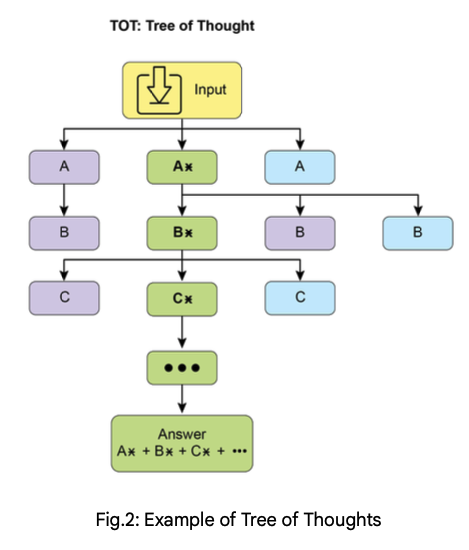

이 접근 방식은 다음과 같은 특징을 갖는다:

- **여러 추론 경로(branch)를 생성**하여 문제를 다양한 관점에서 탐색  
- 경로 중간에서 **백트래킹(backtracking)** 이 가능하여, 잘못된 흐름을 되돌리고 다른 경로를 시도  
- 스스로 오류를 찾아 수정하는 **자기 교정(self-correction)** 과  
  **대안 해법 탐색(exploration of alternative solutions)** 지원

모델이 가능한 추론 경로들의 “나무(tree)”를 유지하면서,  
각 경로를 비교·평가한 뒤 최종 답변을 선택할 수 있기 때문에,  
**전략적 계획과 의사결정이 필요한 어려운 문제**를 다루는 능력이 향상된다.

**반복적·탐색적 추론 과정**을 통해,    
ToT는 단일 경로 추론보다 더 **유연하고 강력한 문제 해결 능력**을 LLM에 부여한다..

### Self-Correction 

**Self-correction(자기 수정)**, 또는 **self-refinement(자기 정제)** 는    
**Chain-of-Thought(CoT) 프롬프트**에서 매우 중요한 요소.

에이전트가 **스스로 생성한 내용과 중간 사고 과정**을     
내부적으로 다시 평가하고 점검하는 절차      

이를 통해 에이전트는 다음과 같은 것들을 스스로 발견하고 개선할 수 있다:

- 애매모호한 표현  
- 정보의 누락 또는 부족한 부분  
- 이해나 해결 과정에 존재하는 오류나 부정확한 지점

이러한 **검토 → 수정 → 재검토**의 반복 루프를 통해,  
에이전트는 자신의 접근 방식을 조정하고,  
최종적으로 더 높은 품질의 응답을 만들어 낼 수 있습니다.  

결과적으로 self-correction은:

- 응답의 **정확도(accuracy)**  
- **철저함(thoroughness)**  
- 전체적인 **신뢰도와 품질**

을 높여 준다.

---
```python
당신은 매우 비판적이고 세밀한 **자기 수정(Self-Correction) 에이전트**입니다.
당신의 임무는 이전에 생성된 콘텐츠를
처음 주어진 요구사항과 비교하여 검토하고,
개선이 필요한 부분을 찾아내는 것입니다.
목표는 콘텐츠를 더 정확하고,
포괄적이며, 매력적이고, 프롬프트와 잘 정렬되도록 다듬는 것입니다.

아래 자기 수정 과정을 반드시 따르십시오:

1. **원래 요구사항 이해하기:**  
   초기 프롬프트/요구사항을 다시 확인하세요.  
   *원래 의도*는 무엇인가요? 핵심 제약 조건과 목표는 무엇이었나요?

2. **현재 콘텐츠 분석하기:**  
   제공된 콘텐츠를 주의 깊게 읽으세요.

3. **불일치/약점 찾기:**  
   현재 콘텐츠를 원래 요구사항과 비교하면서 다음을 점검하세요:
   * **정확성(Accuracy):** 사실 오류나 오해의 소지가 있는 표현이 있나요?
   * **완전성(Completeness):** 원래 프롬프트의 모든 요소를 충분히 다루고 있나요? 빠진 부분은 없나요?
   * **명확성 & 일관성:** 문장이 명확하고 이해하기 쉬운가요? 논리적인 흐름이 유지되나요?
   * **톤 & 스타일:** 원하는 톤과 스타일(예: 전문적, 친근함, 간결함 등)에 맞나요?
   * **참여도(Engagement):** 독자의 관심을 끌고 유지할 수 있나요?
   * **중복/장황함:** 의미 손실 없이 줄이거나 삭제 가능한 부분이 있나요?

4. **구체적인 개선안 제시:**  
   발견한 약점마다 **구체적이고 실행 가능한 수정 제안**을 내놓으세요.  
   단순히 문제를 지적하는 데 그치지 말고, **어떻게 고칠지**까지 제안해야 합니다.

5. **수정된 최종 콘텐츠 생성:**  
   제안한 개선 사항을 모두 반영하여 원래 콘텐츠를 다시 작성하세요.  
   최종 결과물은 바로 사용할 수 있을 정도로 매끄럽고 완성도가 높아야 합니다.

---

**원래 프롬프트/요구사항 (Original Prompt/Requirements):**  
"‘GreenTech Gadgets’라는 **새로운 친환경 제품 라인**을 알리는  
짧고 매력적인 소셜 미디어 글을 써라. (최대 150자)"

---

**초안 (Initial Draft, 수정 대상 콘텐츠):**  
"우리는 새 제품이 있습니다. 친환경 기술 제품이에요. 지금 GreenTech Gadgets를 구매하세요!"

---

**Self-Correction Agent의 사고 과정 (내부 CoT 출력 – 프롬프트에 의해 유도됨):**

**생각 1 (원래 요구사항 이해):**
- 짧고, 매력적인 소셜 미디어 글이어야 한다.
- 최대 150자.
- "GreenTech Gadgets"를 소개해야 한다.
- 새로 나온 **친환경 제품 라인**이라는 점을 알려야 한다.

**생각 2 (현재 콘텐츠 분석):**
"우리는 새 제품이 있습니다. 친환경 기술 제품이에요. 지금 GreenTech Gadgets를 구매하세요!"
(총 약 40자 내외, 길이 제한은 만족)

**생각 3 (불일치/약점 찾기):**
- **매력도(Engaging):** 문장이 밋밋하고 광고 문구로서 임팩트가 약함.
- **친환경 강조:** "친환경"이라는 말은 있지만, 구체적 이점이나 느낌이 약하게 전달됨.
- **콜투액션(Call to Action):** "구매하세요"는 기본적이지만, 더 설득력 있게 만들 수 있음.
- **간결함/임팩트:** 짧긴 하지만, 동사와 표현이 평이하여 눈에 잘 띄지 않음.
- **출시 이벤트 느낌:** “새로운 라인 런칭”의 기대감과 설렘이 충분히 드러나지 않음.

**생각 4 (구체적인 개선안 제시):**
- 문장을 더 역동적이고 설레는 톤으로 변경한다.
- "친환경"과 "혁신" 이미지를 더 분명하게 강조한다.
- 더 강력하고 행동을 유도하는 call to action을 사용한다.
- 이모지와 해시태그를 활용해 소셜 미디어에서의 시각적 주목도를 높인다.
- 전체 길이는 150자 이내로 유지한다.

**생각 5 (수정된 콘텐츠 생성):**
원문:  
"우리는 새 제품이 있습니다. 친환경 기술 제품이에요. 지금 GreenTech Gadgets를 구매하세요!"

수정안 1:  
"🌱 GreenTech Gadgets 출시! 친환경 혁신으로 지구도 지키고, 일상도 업그레이드하세요. 지금 바로 만나보세요! #친환경 #GreenTech"

이 수정안은:
- 새로 나온 친환경 제품 라인이라는 점을 명확히 강조하고,
- 이모지로 주목도를 높이며,
- 더 강력한 콜투액션과 긍정적인 감성을 담고,
- 소셜 미디어용 짧고 매력적인 스타일을 유지합니다. (150자 내외)

---

**Self-Correction Agent의 최종 수정본 (사용자에게 전달할 출력):**

🌱 GreenTech Gadgets 출시! 친환경 혁신으로 지구도 지키고, 일상도 업그레이드하세요. 지금 바로 만나보세요! #친환경 #GreenTech
```
---

### Program-Aided Language Models (PALMs)

LLM(대규모 언어 모델)에 **기호적(Symbolic) 추론 능력**을 결합한 방식.  

PALMs는 복잡한 계산, 논리 연산, 데이터 조작과 같은 작업을  
**결정론적인 프로그래밍 환경**에 위임(offload)한다.  

기호적 난제(symbolic challenge)에 직면했을 때,  
모델은 먼저 코드를 생성한 뒤 이를 실행하고,  
그 결과를 다시 자연어로 변환하여 설명할 수 있습니다.  

이러한 **하이브리드 방식**은  
- LLM의 이해 및 생성 능력과  
- 정밀한 계산 능력  

을 결합함으로써,  
더 넓은 범위의 복잡한 문제를 **더 높은 신뢰성과 정확도로 처리**할 수 있게 한다.

이는 에이전트에게 특히 중요한데,  
에이전트가 자신의 이해·생성 능력에 더해 **정확한 계산을 활용**함으로써  
더 신뢰할 수 있고 정밀한 행동을 수행할 수 있다.  

### Reinforcement Learning with Verifiable Rewards (RLVR)

답을 내리기 전에 **가변적인 양의 ‘생각(thinking) 시간’** 을 할당하는 모델.   

이 “생각” 과정에서 모델은 수천 토큰에 이를 수 있는  
훨씬 더 **길고 역동적인 Chain-of-Thought**를 생성한다.  
확장된 추론은 다음과 같은 복잡한 행동을 가능하게 한다.

이러한 추론 모델을 가능하게 만드는 핵심은
**Reinforcement Learning from Verifiable Rewards (RLVR)** 라는 학습 방법이다.

RLVR에서는 **정답이 검증 가능한 문제들**(예: 수학, 코드 등)을 가지고 모델을 학습시킨다.  
모델은 여러 번의 시도와 오류(trial and error)를 거치면서  
**길고 구조화된 추론 과정(long-form reasoning)** 을 어떻게 잘 만들어야 하는지를 학습한다.  
이 과정에서 모델은 사람이 일일이 감독하지 않아도  
점점 더 나은 문제 해결 능력을 스스로 발전시킬 수 있다.

궁극적으로 이러한 추론 모델들은 단순히 **정답만 출력하는 것이 아니라**,  
다음과 같은 고급 능력을 보여주는 **“추론 궤적(reasoning trajectory)”** 을 생성한다.

이처럼 향상된 추론·전략화 능력은  
인간의 개입을 최소화한 채로 복잡한 작업을 쪼개고 해결할 수 있는  
**자율형 AI 에이전트**를 개발하는 데 있어 매우 중요한 기반이 된다.

### ReAct (Reasoning and Acting)

**Chain-of-Thought(CoT) 프롬팅**과 에이전트가 **도구를 통해 외부 환경과 상호작용하는 능력**을 통합한 패러다임    
     
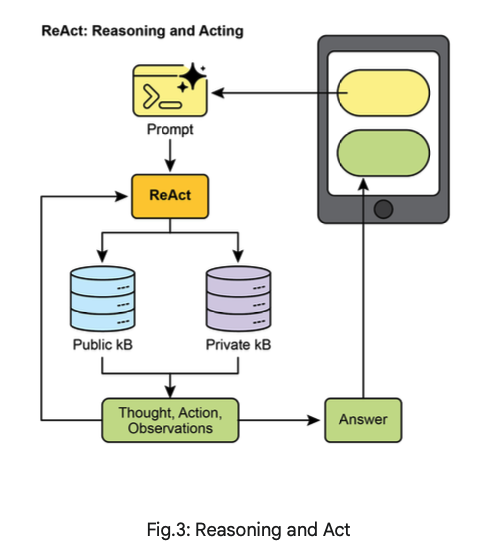    
    
#### ReAct 에이전트는 **어떤 행동을 취할지에 대해 먼저 추론**한다.  

이 추론 단계에서는 에이전트가 CoT와 유사한 **내부 계획 과정(planning)** 을 수행하며,  
- 다음에 무엇을 할지 결정하고,  
- 사용할 수 있는 도구들을 고려하며,  
- 그 결과를 예상한다.  

#### 다음 단계에서 에이전트는 실제로 **도구 또는 함수 호출을 실행**한다.  

ReAct는 **생각(Thought)과 행동(Action)이 교차하는(interleaved) 방식**으로 동작한다.  
에이전트는 한 번 행동을 실행한 뒤, 그 **결과(Observation)를 관찰**하고, 다시 다음 추론에 반영한다.    
    
이러한 **“Thought → Action → Observation → Thought …”** 의 반복 루프를 통해, 에이전트는  
- 계획을 동적으로 수정하고,  
- 오류를 바로잡으며,  
- 환경과 여러 차례 상호작용이 필요한 목표를 달성할 수 있다.  

이 접근 방식은 에이전트가 **실시간 피드백에 반응하며 계획을 조정**할 수 있어서,    
단순히 직선형으로 진행되는 CoT보다 **더 견고하고 유연한 문제 해결 방식**을 제공한다.    
    
언어 모델의 **이해 및 생성 능력**에 더해, **도구를 사용할 수 있는 실행 능력**을 결합함으로써  
ReAct는 **추론과 실제 실행이 모두 필요한 복잡한 작업**을 수행할 수 있게 한다.  

이러한 접근은 에이전트가 단순히 머릿속으로만 생각하는 수준을 넘어,  
**실제 단계를 실행하고 동적인 환경과 상호작용**할 수 있게 한다는 점에서  
에이전트 설계에 매우 중요한 기법이다.


### CoD (Chain of Debates)

CoD(Chain of Debates)는 마이크로소프트가 제안한 **형식적인 AI 프레임워크**로,  
하나의 AI가 혼자서 “chain of thought(사고의 연쇄)”를 수행하는 방식을 넘어선    
여러 개의 **다양한 모델들이 협력하고 논쟁을 벌이며 문제를 해결**하도록 설계된 방식.    


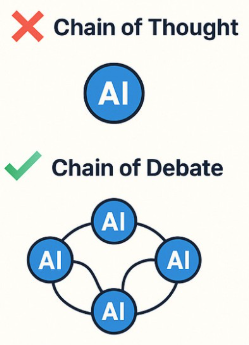


마치 **AI로 구성된 위원회 회의(council meeting)** 와 비슷하게 동작한다.  
서로 다른 모델들이 먼저 **초기 아이디어를 제시**하고,  
서로의 **추론을 비판**하며,  
**반론(counterargument)을 주고받는** 식으로 상호 작용한다.

더 나은 답을 도출하기 위해 **집단 지성(collective intelligence)** 을 활용한다.    
- **정확도 향상**  
- **편향 감소**  
- **최종 답변의 전반적인 품질 향상**

이 방법은 AI 버전의 **동료 평가(peer review)** 와도 같아서,  
추론 과정 전체에 대한 **투명하고 신뢰할 수 있는 기록**을 만든다.  

궁극적으로 CoD는, **여러 에이전트가 팀을 이루어 더 견고하고 검증된 해답을 찾아가는 협력적 패러다임**으로의 전환.

### GoD (Graph of Debates)

GoD(Graph of Debates)는 토론을 단순한 “체인(선형 흐름)”이 아니라  
**동적인 비선형 네트워크(graph)** 로 다시 설계한 고급 에이전틱(Agentic) 프레임워크이다.

이 모델에서 **각 주장은 하나의 노드(node)** 로 표현되며,  
노드들 사이의 엣지(edge)는  
- `supports`(지지함)  
- `refutes`(반박함)  

과 같은 관계를 나타낸다.  
이를 통해 실제 토론이 가진 **멀티스레드(여러 갈래로 동시에 전개되는)** 특성을 반영한다.

이 구조에서는 새로운 탐구/질문 라인이 **동적으로 분기(branch)** 될 수 있고,  
각 가지가 **독립적으로 발전**하다가,  
시간이 지나면서 다시 **서로 합쳐지거나(merge)** 교차할 수도 있다.  

따라서 결론이 
그래프 전체에서 **가장 견고하고 충분히 지지되는(argument cluster) 주장들의 클러스터**를  
식별함으로써 도출된다.

여기서 말하는 **“well-supported(충분히 지지됨)”** 이란,  
단단하고 검증 가능한 지식을 의미하며, 다음을 포함한다.

1. **Ground Truth(사실로 확립된 지식)**  
   - 본질적으로 올바르다고 받아들여지고,  
     널리 사실로 인정되는 정보.

2. **Search Grounding을 통해 검증된 사실적 증거**  
   - 외부 검색, 지식 베이스, 현실 세계 데이터 등에  
     정보를 대조·검증하여 뒷받침되는 증거.

3. **여러 모델 간 토론을 통해 형성된 합의(Consensus)**  
   - 다수의 모델이 논쟁 과정에서  
     높은 수준의 일치와 확신을 보이는 결론.

이와 같은 포괄적인 기준을 적용함으로써,  
GoD는 논의되고 있는 정보가 **더 견고하고 신뢰할 수 있는 기반** 위에 서 있도록 한다.

결과적으로 GoD는 복잡하고 협력적인 AI 추론을  
**더 전체적이고(realistic), 현실을 닮은 방식으로 모델링**할 수 있는 접근법을 제공한다.

### MASS (Multi-Agent System Search)

**멀티 에이전트 시스템(MAS)의 설계**를 자동화하고 최적화하기 위해 제안된 프레임워크이다.

멀티 에이전트 시스템 설계를 깊이 있게 분석해 보면, 시스템의 효과성은 다음 두 가지에 **결정적으로 의존**한다.

1. **개별 에이전트를 프로그래밍하는 데 사용되는 프롬프트의 품질**  
2. **에이전트들 사이의 상호작용 방식을 규정하는 토폴로지(topology, 연결 구조)**  

이러한 시스템을 설계하는 일은 **거대하고 복잡한 탐색 공간(search space)** 을 다루어야 하기 때문에 어렵다.  

이 문제를 해결하기 위해, 멀티 에이전트 시스템의 설계를 **자동화하고 최적화**하기 위한 새로운 프레임워크인  
**MASS(Multi-Agent System Search)** 가 제안되었다.

MASS는 **프롬프트 최적화와 토폴로지 최적화를 교차(interleave)시키는**  
다단계(multi-stage) 최적화 전략을 사용하여,  
이 복잡한 설계 공간을 **체계적으로 탐색**한다

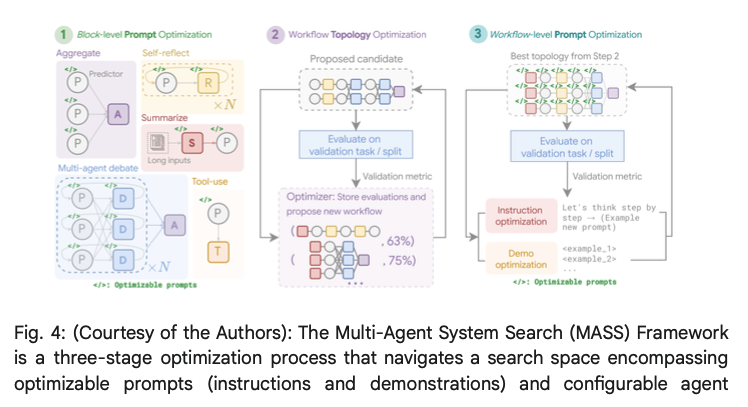


MASS 전체는 다음과 같은 **빌딩 블록(모듈)** 들을 기반으로 한다:  
`Aggregate`, `Reflect`, `Debate`, `Summarize`, `Tool-use`.

그리고 세 단계로 구성된 최적화 과정을 거친다.

1. **1단계 – Block-level Prompt Optimization**  
   - 각 에이전트 모듈에 대해 **독립적으로 프롬프트를 최적화**

2. **2단계 – Workflow Topology Optimization**  
   - 영향력 가중(influence-weighted) 설계 공간에서  
     **유효한 시스템 구성(토폴로지)을 샘플링**하고,  
     1단계에서 최적화된 프롬프트들을 이 토폴로지에 통합

3. **3단계 – Workflow-level Prompt Optimization**  
   - 2단계에서 **최적 워크플로가 결정된 이후**,  
     전체 멀티 에이전트 시스템을 대상으로  
     **두 번째 라운드의 프롬프트 최적화**를 수행

#### 1. Block-Level Prompt Optimization

먼저 개별 에이전트 타입(혹은 “블록”)에 대해 **로컬 프롬프트 최적화**를 수행.  

> 목표:  각 컴포넌트가 더 큰 시스템에 통합되기 전에 **자기 역할을 충분히 잘 수행하도록 만드는 것**이다.

이 초기 단계가 중요한 이유는, 이후에 진행되는 **토폴로지(topology) 최적화**가  
설정이 엉망인 에이전트들 위에서 굴러가며 오류가 누적되는 상황을 막고,  
**이미 잘 동작하는 에이전트들을 기반으로 설계**를 이어 갈 수 있게 해 주기 때문이다.
|
예를 들어, HotpotQA 데이터셋을 대상으로 최적화를 수행할 때는  
“Debator” 에이전트의 프롬프트를 다음과 같이 **창의적인 역할 지시(role-playing)** 로 설계한다.

> “유명 언론사의 **전문 팩트체커(expert fact-checker)** 로 행동하라.”

이 에이전트의 최적화된 작업(task)은 다음과 같다.

- 다른 에이전트들이 제안한 후보 답변을 **세밀하게 검토**하고,  
- 제공된 컨텍스트 문단들과 **교차 확인(cross-reference)** 하며,  
- **모순되거나 근거 없는 주장**을 찾아내는 것.

이처럼 Block-Level Optimization 단계에서 발견된 **특화된 역할 기반 프롬프트** 덕분에,  
Debator 에이전트는 더 큰 워크플로우에 포함되기 이전부터  
**정보를 정교하게 검증·통합(synthesizing)하는 역량**을 갖춘 블록으로 준비된다.

#### 2. Workflow Topology Optimization

이 단계에서는 사용자가 정의할 수 있는 **설계 공간(design space)** 안에서  
서로 다른 에이전트들의 상호작용 패턴을 **선택하고 배열**하여,  

> 목표: 가장 효과적인 워크플로 구조를 탐색

탐색을 효율적으로 만들기 위해 **influence-weighted 방식**을 사용한다.  
이 방법은 각 토폴로지가 **기준(baseline) 에이전트 대비 성능을 얼마나 개선하는지**를 측정하여  
“증분 영향력(incremental influence)”으로 수치화한다.  
영향력 점수를 기반으로 탐색을 **더 유망한(top-performing) 토폴로지 조합 방향으로 유도**.

이렇게 발견된 워크플로는 코딩 문제의 경우  
**반복적인 자기 수정(iterative self-correction)** 과  
**외부 검증(external verification)** 을 결합한 구조가  
더 단순한 멀티 에이전트 시스템(MAS) 설계보다 **우월하다**는 점을 보인다.

#### 3. Workflow-Level Prompt Optimization

**최적의 토폴로지(topology)** 가 선정되고 나면,  
개별 에이전트가 아니라 **멀티 에이전트 시스템 전체를 하나의 통합된 엔티티**로 보고  
프롬프트를 미세 조정(fine-tuning)한다.  

> 목표: 프롬프트들이 **오케스트레이션(orchestration)에 잘 맞게 조율**되고,  
> 에이전트들 간 **상호 의존성(interdependencies)** 이 최대한 효율적으로 작동하도록 최적화

최종적으로 최적화된 프롬프트는 매우 **디테일한 형태**를 띠는데,  
대략 다음과 같은 요소들을 포함한다.

- 먼저 에이전트에게 **데이터셋에 대한 요약 정보**를 제공한다.  
  - 예: 이 데이터셋이  
    - *“extractive question answering”*  
    - *“numerical information”*  
    에 초점을 맞추고 있다는 설명.
- 이어서 **정확한 질의응답 동작을 보여주는 few-shot 예시들**을 포함한다.
- 마지막으로, 핵심 지시문을 **고위험·고중요도의 역할극(role-playing)** 으로 프레이밍한다.  
  - 예:  
    > “당신은 긴급 뉴스 보도를 위해 **중요한 수치 정보를 추출하는 특수 목적 AI** 입니다.  
    > 라이브 방송이 당신의 **정확도와 속도**에 전적으로 의존하고 있습니다.”

### Key Findings and Principles

MASS 연구로부터 도출된, 효과적인 MAS 설계를 위한 핵심 원칙은 세 가지    

1. 개별 에이전트들을 조합하기 전에, 고품질 프롬프트로    
   각 에이전트를 먼저 최적화하라.    

2. 제한이 없는 탐색 공간을 무작정 탐색하는 대신,    
   영향력 있는 토폴로지들을 조합하여 MAS를 구성하라.    

3. 최종적으로 워크플로 수준의 공동 최적화를 통해    
   에이전트들 간의 상호 의존성을 모델링하고 최적화하라.    

---

앞서 핵심 추론 기법들에 대해 논의한 내용을 바탕으로,    
먼저 하나의 핵심 성능 원칙인    
“LLM을 위한 추론 스케일링 법칙(Scaling Inference Law)”을 살펴보자.    

> 모델에 할당되는 계산 자원이 증가함에 따라 모델의 성능이 예측 가능하게 향상된다.

Deep Research 시스템에서는 AI 에이전트는 자원을 활용하여    
하나의 주제를 여러 개의 하위 질문으로 분해하고,    
웹 검색(Web search)을 도구로 사용하여 조사한 뒤,    
그 결과를 종합(synthesize)하여 답을 만들어낸다.

### Deep Research

"Deep Research"라는 용어는, 지치지 않고 체계적으로 일하는 **연구 보조원**처럼 동작하도록 설계된 AI 에이전틱 도구의 한 범주를 가리킨다.    
이 영역의 주요 플랫폼에는 Perplexity AI, Google의 Gemini 기반 리서치 기능, 그리고 ChatGPT 내 OpenAI의 고급 기능들이 포함된다

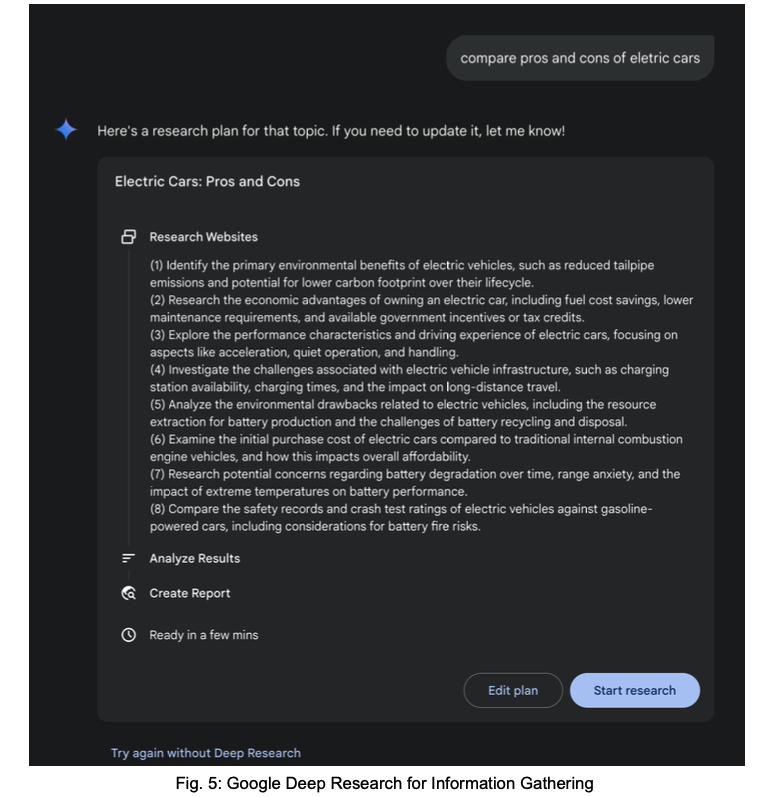

이 도구들이 도입한 근본적인 변화 중 하나는 **검색 과정 자체의 변화**이다.     
일반적인 검색은 즉각적인 링크들을 제공하고, 그 링크들을 종합하는 일은 사용자에게 남겨 둔다.     
복잡한 질의를 AI에게 맡기고, 보통 몇 분 정도의 **"시간 예산(time budget)"**을 부여한다.     
기다림에 대한 보상으로, 사용자는 상세한 보고서를 받게 된다.    

부여 받은 시간 동안 AI는 에이전틱 방식으로  사람이 한다면 엄청난 시간이 걸릴 일련의 정교한 단계들을 스스로 수행한다.    

1. **초기 탐색(Initial Exploration)**: 초기 프롬프트를 기반으로 여러 개의 목적 지향적인 검색을 수행한다.  

2. **추론과 정교화(Reasoning and Refinement)**: 첫 번째 검색 결과들을 읽고 분석하며, 그 내용을 종합한 뒤, 더 많은 세부 정보가 필요한 부분, 모순, 빈틈을 비판적으로 식별한다.  

3. **후속 탐색(Follow-up Inquiry)**: 내부 추론에 기반해, 그 빈틈을 메우고 이해를 심화하기 위해 더 미묘하고 정교한 새로운 검색들을 수행한다.  

4. **최종 종합(Final Synthesis)**: 이러한 반복적인 검색과 추론을 여러 차례 거친 후, 검증된 모든 정보를 하나의 일관되고 구조화된 요약본으로 정리한다.

이와 같은 체계적인 접근은 **포괄적이고 충분히 논리적인 응답**을 보장하며, 정보 수집의 효율성과 깊이를 크게 향상시킨다.

### Scaling Inference Law

LLM의 성능과, 추론(inference) 단계에서 할당되는    
**계산 자원(computational resources)** 사이의 관계를 규정하는 중요한 원칙이다.  

**Inference Scaling Law**는, 모델 생성(훈련) 시기에  
데이터 양과 계산 자원을 늘릴수록 모델 품질이 어떻게 향상되는지를 다루는  
**training scaling laws** 과는 다르다.  

대신, 이 **Inference Scaling Law**는 LLM이 실제로 **출력이나 답변을 생성하고 있는 동안**  
발생하는 **동적인 트레이드오프(trade-off)** 에 초점을 맞춘다.

---

#### 작은 모델 + 더 많은 추론 계산 = 더 나은 결과

이 법칙의 핵심은 다음과 같은 사실에 있다.

> 비교적 작은 LLM이라도,  
> **추론 시점에 더 많은 계산 자원을 투자**하면  
> 더 큰 모델 못지않거나, 때로는 그보다 우수한 결과를 낼 수 있다.

여기서 말하는 계산 자원의 증가는  
반드시 더 강력한 GPU를 쓰는 것을 의미하지는 않는다.  
대신, 더 정교하거나 계산 비용이 높은 **추론 전략(inference strategy)** 을 쓰는 것을 의미한다.

대표적인 예:

- 모델에게 **여러 개의 잠재적인 답변**을 생성하게 한다.  
  - 예: 다양한 빔 탐색(diverse beam search), self-consistency 기법 등  
- 그런 다음, **선택 메커니즘(selection mechanism)** 을 사용해  
  가장 최적의 출력을 고른다.

이처럼 반복적인 정제(iterative refinement)나  
다중 후보 생성(multiple-candidate generation) 과정은  
더 많은 계산 사이클을 요구하지만,  
**최종 응답의 품질을 크게 향상**시킬 수 있다.

---

#### “생각 예산(Thinking Budget)”의 의미

이 원칙은 “큰 모델이 항상 더 좋은 성능을 낸다”는  
직관적인 생각에 반박한다.

이 법칙에 따르면:

- 더 작은 모델이라도  
- 추론 단계에서 더 큰 **“생각 예산(thinking budget)”** 을 부여받으면  
- 단순하고 계산이 덜 드는 방식으로 동작하는  
  **훨씬 큰 모델의 성능을 뛰어넘을 수도 있다.**

여기서 “생각 예산”이란:

- 추론 과정에서 추가로 투입되는 **계산 단계**들  
- 혹은 더 **복잡한 알고리즘**들을 가리킨다.

이를 통해 작은 모델도:

- 더 넓은 가능성 공간을 탐색하고  
- 답을 내리기 전에 더 엄격한 **내부 검증(internal checks)** 을 수행할 수 있다.

---

#### 에이전틱 시스템 설계에서의 중요성

Scaling Inference Law는  
**효율적이고 비용 효과적인( cost-effective ) 에이전틱 시스템**을 구축하는 데  
기본이 되는 원칙이다.  

이 법칙은 다음과 같은 요소들 사이의 균형을 잡는 방법을 제시한다.

- **Model Size (모델 크기)**  
  - 작은 모델은 메모리와 저장소 측면에서 요구 사항이 적다.

- **Response Latency (응답 지연 시간)**  
  - 추론 시 계산을 늘리면 지연 시간이 증가할 수 있다.  
  - 이 법칙은 성능 향상이 그 증가분을 상쇄하는 지점을 찾거나,  
    지연을 과도하게 늘리지 않도록  
    계산을 **전략적으로 적용하는 방법**을 생각하게 한다.

- **Operational Cost (운영 비용)**  
  - 더 큰 모델을 배포·운영하면  
    전력 사용과 인프라 요구사항 증가로 인해  
    지속적인 운영 비용이 커진다.  
  - 이 법칙은 **불필요하게 비용을 키우지 않으면서도**  
    성능을 최적화하는 방법을 보여준다.

---

#### 정리

Scaling Inference Law를 이해하고 활용하면,  
개발자와 조직은 특정 에이전틱 애플리케이션에 대해  
**가장 큰 효과를 내는 지점에 계산 자원을 배분**하는  
전략적인 선택을 할 수 있다.

이 법칙은 단순한  
> “모델은 클수록 좋다(bigger is better)”  
라는 패러다임을 넘어서,

- **어떤 크기의 모델에**  
- **얼마나 많은 추론 자원을**  
- **어떤 방식으로 투자할 것인지**  

를 정교하게 설계하도록 돕는 개념적 프레임워크라고 할 수 있다.

### DeepResearch 구현 : MASS 1 단계
> 먼저 각 블록(에이전트)을 로컬하게 최적화 가능한 단위로 잘게 자르고,
> 역할·프롬프트·출력 스키마를 안정적으로 잡아둔다

In [1]:
from __future__ import annotations

import os
from dotenv import load_dotenv
from typing import Dict, List, Any, Optional
from pydantic import BaseModel, Field

from langgraph.func import task
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from tavily import TavilyClient

공통 LLM & Tavily 클라이언트

In [13]:
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
GEMINI_MODEL = "gemini-2.0-flash"
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

def create_llm() -> ChatGoogleGenerativeAI:
    """Gemini 2.5 Flash LLM 생성기"""
    return ChatGoogleGenerativeAI(
        api_key=GEMINI_API_KEY,
        model=GEMINI_MODEL,
        temperature=0.3,
        max_output_tokens=4096,
    )

def create_tavily_client() -> TavilyClient:
    """Tavily 클라이언트 생성기"""
    return TavilyClient(api_key=TAVILY_API_KEY)

State 정의

In [14]:
class AnalysisItem(BaseModel):
    sub_question: str = Field(description="분석 대상 하위 질문.")
    summary: List[str] = Field(
        description="핵심 사실 요약을 문장 단위로 나눈 리스트."
    )
    contradictions: List[str] = Field(
        description="출처 간 모순/불일치 사항. 없으면 ['없음'] 등으로 표시."
    )
    gaps: List[str] = Field(
        description="추가 조사가 필요한 지식 갭. 없으면 ['없음'] 등으로 표시."
    )
    followup_queries: List[str] = Field(
        description="후속 심층 조사를 위한 추가 질문 리스트. 없으면 빈 리스트 또는 ['없음'] 등으로 표시."
    )




class ResearchState(BaseModel):
    # 입력
    query: str

    # Planner 결과
    sub_questions: List[str] = Field(default_factory=list)
    plan_summary: Optional[str] = None

    # Searcher 결과 (각 하위 질문 -> 검색 결과 리스트)
    # docs 스키마는 TavilyClient.search()의 반환값을 따름
    search_results: Dict[str, List[Dict[str, Any]]] = Field(default_factory=dict)

    # Analyst 결과 ( 구조화된 분석 )
    analysis: List[AnalysisItem] = Field(default_factory=list)

    # Synthesizer 결과
    final_answer: Optional[str] = None
    final_limitations: Optional[str] = None
    final_references: List[str] = Field(default_factory=list)


Planner 블록 (질문 분해)

In [15]:
class PlannerOutput(BaseModel):
    """Planner가 반환해야 하는 구조화된 출력"""
    sub_questions: List[str] = Field(
        description="사용자 질문을 이해하기 쉬운 여러 개의 하위 질문 리스트."
    )


def build_planner(llm: ChatGoogleGenerativeAI):
    """사용자 질문을 한국어 하위 e질문들로 분해하는 Planner 블록."""

    planner_prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                (
                    "당신은 복잡한 질문을 구조화하는 전문 리서치 플래너입니다.\n"
                    "주어진 사용자의 질문을 이해하기 쉬운 여러 개의 하위 질문으로 분해해야 합니다.\n\n"
                    "요구사항:\n"
                    "1. 하위 질문은 3~6개 정도로 작성합니다.\n"
                    "2. 각 하위 질문은 예/아니오로 답할 수 있는 형태가 아니라, "
                    "구체적인 사실이나 근거를 찾을 수 있는 형태여야 합니다.\n"
                    "3. 서로 중복되는 질문은 피하고, 서로 다른 측면을 다루도록 합니다.\n"
                    "4. 가능한 한 웹 검색을 통해 답을 찾을 수 있는 방식으로 서술합니다.\n\n"
                    "출력은 JSON이 아니라, 아래 Pydantic 스키마에 맞는 구조화된 객체로 반환해야 합니다.\n"
                    "- 필드: sub_questions: List[str]\n"
                ),
            ),
            (
                "human",
                "사용자 질문:\n{query}\n\n"
                "위 조건을 만족하도록 하위 질문들을 생성하세요."
            ),
        ]
    )

    structured_llm = llm.with_structured_output(PlannerOutput)
    chain = planner_prompt | structured_llm

    @task()
    async def planner(state: ResearchState) -> ResearchState:
        """질문을 서브 질문들로 분해."""
        output: PlannerOutput = await chain.ainvoke({"query": state.query})

        state.sub_questions = output.sub_questions
        state.plan_summary = f"생성된 하위 질문 {len(output.sub_questions)}개"
        return state

    return planner

Searcher 블록 (TavilyClient로 검색)

In [16]:
class SearchQueriesOutput(BaseModel):
    """Searcher가 생성하는 검색 쿼리 리스트."""
    queries: List[str] = Field(
        description="Tavily 검색에 사용할 2~3개의 자연어 쿼리."
    )

def build_searcher(llm: ChatGoogleGenerativeAI, tavily_client: TavilyClient):
    """
    각 하위 질문에 대해 검색 쿼리를 생성하고 TavilyClient로 검색하는 블록.
    LLM → SearchQueriesOutput(queries: List[str]) 구조로 받아서 파싱을 최소화한다.
    """

    query_prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                (
                    "당신은 웹 검색을 위한 질의어를 설계하는 검색 전문가입니다.\n"
                    "주어진 하위 질문을 바탕으로 Tavily 검색 API에 넣을 수 있는 "
                    "핵심 키워드 위주의 검색 쿼리를 2~3개 제안하세요.\n\n"
                    "요구사항:\n"
                    "- 한국어 자료가 유리하면 한국어 쿼리를, 해외 자료가 중요하면 영어 쿼리를 섞어서 사용하세요.\n"
                    "- 각 쿼리는 한 문장으로, 불필요한 장식 없이 핵심 키워드 위주로 작성합니다.\n"
                    "- 너무 일반적인 단어(예: 'AI', '기술')만 있지 않도록 구체적인 조건을 포함하세요.\n\n"
                    "출력은 SearchQueriesOutput(queries: List[str]) 스키마를 따르며, "
                    "queries 필드에 검색 쿼리 문자열만 담아야 합니다."
                ),
            ),
            (
                "human",
                "하위 질문:\n{sub_question}\n\n"
                "위 조건에 맞는 검색 쿼리들을 생성하세요."
            ),
        ]
    )

    structured_llm = llm.with_structured_output(SearchQueriesOutput)
    chain = query_prompt | structured_llm

    @task
    async def searcher(state: ResearchState) -> ResearchState:
        """각 하위 질문에 대해 검색 쿼리를 생성하고 TavilyClient로 검색."""
        new_results: Dict[str, List[Dict[str, Any]]] = dict(state.search_results)

        for sq in state.sub_questions:
            sq_output: SearchQueriesOutput = await chain.ainvoke({"sub_question": sq})
            queries = sq_output.queries[:3] # limit

            docs_for_sq: List[Dict[str, Any]] = []

            for q in queries:
                # TavilyClient.search() 호출
                tavily_resp = tavily_client.search(
                    query=q,
                    search_depth="basic",
                    max_results=5,
                    include_raw_content=True,
                    include_answer=False,
                )
                # tavily_resp: {"results": [...], ...}
                for item in tavily_resp.get("results", []):
                    docs_for_sq.append(
                        {
                            "query": q,
                            "title": item.get("title"),
                            "url": item.get("url"),
                            "content": item.get("content") or item.get("raw_content"),
                        }
                    )
            new_results[sq] = docs_for_sq

        state.search_results = new_results
        return state

    return searcher



Analyst 블록 (structured_output)

In [17]:
def build_analyst(llm: ChatGoogleGenerativeAI):
    """
    검색 결과를 읽고 요약, 모순, 지식 갭, 추가 검색 제안을 구조화해서 반환하는 블록.
    출력은 AnalysisItem 스키마에 맞춘 structured_output으로 받는다.
    """

    analyst_prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                (
                    "당신은 고급 리서치 분석가입니다.\n"
                    "주어진 하위 질문과 관련 검색 결과 스니펫들을 읽고 다음을 수행하세요.\n\n"
                    "1) 핵심 사실 요약 (중요한 사실을 한국어 문장 리스트로 정리)\n"
                    "2) 출처 간에 보이는 모순이나 불일치 (있으면 구체적으로, 없으면 '없음')\n"
                    "3) 아직 불명확하거나 추가 조사가 필요한 부분(지식 갭)\n"
                    "4) 있다면, 후속 검색에 사용할 수 있는 구체적인 추가 검색 쿼리 1~2개\n\n"
                    "출력은 AnalysisItem 스키마를 따라야 합니다:\n"
                    "- sub_question: str\n"
                    "- summary: List[str]\n"
                    "- contradictions: List[str]\n"
                    "- gaps: List[str]\n"
                    "- followup_queries: List[str]\n"
                ),
            ),
            (
                "human",
                "하위 질문:\n{sub_question}\n\n"
                "검색 스니펫 목록:\n{snippets}\n"
            ),
        ]
    )

    structured_llm = llm.with_structured_output(AnalysisItem)
    chain = analyst_prompt | structured_llm

    @task
    async def analyst(state: ResearchState) -> ResearchState:
        """Tavily 검색 결과를 기반으로 구조화된 분석 결과 리스트 생성."""
        analyses: List[AnalysisItem] = []

        for sq, docs in state.search_results.items():
            # 1) 검색 결과가 아예 없으면 LLM 안 부르고 fallback AnalysisItem 직접 생성
            if not docs:
                analyses.append(
                    AnalysisItem(
                        sub_question=sq,
                        summary=["검색 결과가 부족해서 확실한 결론을 내리기 어렵습니다."],
                        contradictions=["없음"],
                        gaps=["핵심 정보에 대한 신뢰할 수 있는 자료가 부족합니다."],
                        followup_queries=[f"{sq} 관련 추가 검색 필요"],
                    )
                )
                continue

            # 2) docs 있는 경우에만 스니펫 만들고 LLM 호출
            parts = []
            for idx, doc in enumerate(docs[:3], start=1):
                if doc is None:
                    continue
                parts.append(
                    f"[{idx}] 제목: {doc.get('title')}\n"
                    f"URL: {doc.get('url')}\n"
                    f"내용: {doc.get('content')}\n"
                )
            snippets_text = "\n".join(parts) if parts else "(검색 결과가 없습니다.)"

            item = await chain.ainvoke(
                {"sub_question": sq, "snippets": snippets_text}
            )
            if item is None:
                # structured_output 실패 대비 보강
                analyses.append(
                    AnalysisItem(
                        sub_question=sq,
                        summary=["LLM 구조화 분석에 실패했습니다."],
                        contradictions=["없음"],
                        gaps=["모델 출력이 스키마와 일치하지 않았습니다."],
                        followup_queries=[f"{sq}에 대해 수동 검토 필요"],
                    )
                )
            else:
                analyses.append(item)

        state.analysis = analyses
        return state

    return analyst

Synthesizer 블록 (structured_output)

In [18]:
class SynthesizerOutput(BaseModel):
    """Synthesizer가 반환하는 최종 답변 구조."""
    answer: str = Field(
        description="사용자 원 질문에 대한 최종 한국어 답변 전체 텍스트."
    )
    limitations: Optional[str] = Field(
        default=None,
        description="리서치의 한계 및 주의사항을 한국어로 기술."
    )
    references: Optional[List[str]] = Field(
        default=None,
        description="주요 참고 출처(예: URL, 사이트명 등)를 문자열 리스트로 나열"
    )

def build_synthesizer(llm: ChatGoogleGenerativeAI):
    """
    분석 결과들을 종합해 최종 답변을 생성하는 블록.
    SynthesizerOutput(answer, limitations, references) 형태로 structured_output을 사용한다.
    """

    synth_prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                (
                    "당신은 심층 리서치 결과를 바탕으로 보고서를 작성하는 전문 작가입니다.\n\n"
                    "입력으로는 하위 질문별 분석 결과(핵심 요약, 모순, 지식 갭, 추가 검색 제안)가 주어집니다.\n"
                    "당신의 목표는 다음과 같습니다.\n"
                    "1. 사용자의 원 질문에 대해 일관되고 잘 구조화된 한국어 답변을 작성합니다.\n"
                    "2. 먼저 전체적인 개요를 간단히 제시한 뒤, 세부 항목을 나눠 설명합니다.\n"
                    "3. 가능한 한 구체적인 수치, 사례, 출처를 활용하되, 근거 없는 추측은 피합니다.\n"
                    "4. 문단 끝이나 적절한 위치에 [1], [2]와 같이 인덱스를 붙여, "
                    "나중에 참고문헌과 연결할 수 있도록 합니다.\n"
                    "5. 마지막에는 '한계 및 주의사항' 섹션을 추가하여 리서치의 한계를 솔직하게 작성합니다.\n\n"
                    "출력은 SynthesizerOutput 스키마를 따라야 합니다:\n"
                    "- answer: str  (최종 한국어 답변 전체)\n"
                    "- limitations: Optional[str]  (한계 및 주의사항 섹션 텍스트)\n"
                    "- references: Optional[List[str]]  (주요 참고 출처 요약 또는 URL)\n"
                ),
            ),
            (
                "human",
                (
                    "사용자 원 질문:\n{query}\n\n"
                    "하위 질문별 분석 결과(AnalysisItem 리스트):\n{analysis_text}\n\n"
                    "위 정보를 종합하여 SynthesizerOutput에 맞는 최종 결과를 생성하세요."
                ),
            ),
        ]
    )

    chain = synth_prompt | llm
    # structured_llm = llm.with_structured_output(SynthesizerOutput)
    # chain = synth_prompt | structured_llm

    @task
    async def synthesizer(state: ResearchState) -> ResearchState:
        """구조화된 분석 리스트를 바탕으로 최종 답변 생성."""
        analysis_items = state.analysis or []

        analysis_blocks: List[str] = []
        for item in analysis_items:
            if item is None:
                continue

            summary_lines = [f"- {s}" for s in (item.summary or [])] or ["- (요약 없음)"]
            contr_lines   = [f"- {c}" for c in (item.contradictions or [])] or ["- 없음"]
            gap_lines     = [f"- {g}" for g in (item.gaps or [])] or ["- 없음"]
            follow_lines  = [f"- {fq}" for fq in (item.followup_queries or [])] or ["- 없음"]

            block_lines = [
                "== 하위 질문 ==",
                item.sub_question,
                "",
                "== 핵심 요약 ==",
                *summary_lines,
                "",
                "== 모순 / 불일치 ==",
                *contr_lines,
                "",
                "== 지식 갭 ==",
                *gap_lines,
                "",
                "== 추가 검색 제안 ==",
                *follow_lines,
            ]
            analysis_blocks.append("\n".join(block_lines))

        if analysis_blocks:
            analysis_text = "\n\n------------------------------\n\n".join(analysis_blocks)
        else:
            analysis_text = "(분석 결과가 없습니다.)"

        resp = await chain.ainvoke(
            {"query": state.query, "analysis_text": analysis_text}
        )

        if resp is None:
            # structured_output 실패 대비 보강
            state.final_answer = "최종 답변 생성에 실패했습니다."
            state.final_limitations = None
            state.final_references = []
            return state

        state.final_answer = str(resp.content)
        state.final_limitations = None
        state.final_references = []
        return state

    return synthesizer

### DeepResearch 구현 : MASS 2 단계
> 지금까지 만든 Planner / Searcher / Analyst / Synthesizer 블록을 토폴로지로 엮고,     
> 실험 가능한 형태로 만드는 단계

In [19]:
def has_significant_gaps(analysis_items: List[AnalysisItem]) -> bool:
    """분석 결과에 '지식 갭'이 충분히 많이/크게 있는지 간단히 판정."""
    if not analysis_items:
        return False

    gap_count = 0
    for item in analysis_items:
        # "없음" 말고 실제로 뭔가가 적혀 있으면 갭으로 카운트
        for g in item.gaps:
            if g.strip() and g.strip() not in ("없음"):
                gap_count += 1

    return gap_count >= 2


토폴로지 A: 단일 패스 그래프

In [20]:
from langgraph.func import entrypoint

def build_workflow_topology_A(
    llm: ChatGoogleGenerativeAI,
    tavily_client: TavilyClient,
):
    planner = build_planner(llm)
    searcher = build_searcher(llm, tavily_client)
    analyst = build_analyst(llm)
    synthesizer = build_synthesizer(llm)

    @entrypoint()
    async def agent(input_data: dict) -> ResearchState:
        """
        토폴로지 A:
        Planner → Searcher → Analyst → Synthesizer
        """
        state = ResearchState(query=input_data["query"])

        state = await planner(state)
        print("[A] after planner:", state)
        state = await searcher(state)
        print("[A] after searcher keys:", state)
        state = await analyst(state)
        print("[A] after analyst types:", state)
        state = await synthesizer(state)
        print("[A] final_answer exists?", state)

        return state

    return agent


토폴로지 B: 갭 기반 반복이 있는 그래프

In [21]:
def build_workflow_topology_B(
    llm: ChatGoogleGenerativeAI,
    tavily_client: TavilyClient,
):
    planner = build_planner(llm)
    searcher = build_searcher(llm, tavily_client)
    analyst = build_analyst(llm)
    synthesizer = build_synthesizer(llm)

    @entrypoint()
    async def agent(input_data: dict) -> ResearchState:
        """
        토폴로지 B:
        Planner → Searcher → Analyst → (갭 있으면 Searcher+Analyst 한번 더) → Synthesizer
        """
        state = ResearchState(query=input_data["query"])

        # 1차 라운드
        state = await planner(state)
        print("[B] after planner:", state.sub_questions)
        state = await searcher(state)
        print("[B] after searcher keys:", list(state.search_results.keys()))
        state = await analyst(state)
        print("[B] after analyst types:", [type(x) for x in (state.analysis or [])])

        # 지식 갭이 충분히 크면 추가 라운드
        if has_significant_gaps(state.analysis):
            state = await searcher(state)
            print("[B] after 2nd searcher keys:", list(state.search_results.keys()))
            state = await analyst(state)
            print("[B] after 2nd analyst types:", [type(x) for x in (state.analysis or [])])

        # 최종 합성
        state = await synthesizer(state)
        print("[B] final_answer exists?", bool(state.final_answer))

        return state

    return agent

토폴로지별 성능 측정 루프

In [22]:
class EvalSample(BaseModel):
    query: str
    reference: str

class EvalResult(BaseModel):
    topology_name: str
    sample_index: int
    score: float
    extra_feedback: Optional[str] = None

eval_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            (
                "당신은 답변의 정확도와 완성도를 평가하는 중립적인 채점자입니다.\n"
                "사용자의 질문, 기준 정답(레퍼런스), 모델의 답변이 주어졌을 때 다음 기준으로 0.0~1.0 사이 점수를 부여하세요.\n\n"
                "평가 기준:\n"
                "1. 사실 정확도 (reference와 비교했을 때 중요한 사실 오류가 없는가?)\n"
                "2. 커버리지 (reference가 다루는 핵심 포인트를 얼마나 잘 포함하는가?)\n"
                "3. 논리적 일관성 (답변 전개가 자연스럽고 모순이 없는가?)\n\n"
                "출력 형식:\n"
                "- score: 0.0~1.0 사이의 소수\n"
                "- short_feedback: 한두 문장으로 요약한 평가 코멘트\n\n"
                "출력은 Pydantic 스키마 EvalScoreOutput에 맞춰야 합니다."
            ),
        ),
        (
            "human",
            "질문:\n{query}\n\n"
            "기준 정답(레퍼런스):\n{reference}\n\n"
            "모델의 답변:\n{model_answer}\n"
        ),
    ]
)

class EvalScoreOutput(BaseModel):
    score: float = Field(description="0.0~1.0 사이의 정수")
    short_feedback: str = Field(description="한두 문장의 코멘트")

def build_evaluator(llm: ChatGoogleGenerativeAI):
    structured_llm = llm.with_structured_output(EvalScoreOutput)
    return eval_prompt | structured_llm


async def evaluate_topology(
    topology_name: str,
    agent, # @entrypoint로 만든 LangGraph 함수
    evaluator_chain,
    samples: List[EvalSample],
) -> List[EvalResult]:
    results: List[EvalResult] = []

    for idx, sample in enumerate(samples):
        # 1) 에이전트 실행
        state: ResearchState = await agent.ainvoke({"query": sample.query})

        # 2) 평가 (final_answer 기준)
        eval_output: EvalScoreOutput = await evaluator_chain.ainvoke(
            {
                "query": sample.query,
                "reference": sample.reference,
                "model_answer": state.final_answer or ""
            }
        )

        results.append(
            EvalResult(
                topology_name=topology_name,
                sample_index=idx,
                score=eval_output.score,
                extra_feedback=eval_output.short_feedback,
            )
        )

    return results

def summarize_results(
    baseline_results: List[EvalResult],
    candidate_results: List[EvalResult],
) -> Dict[str, Any]:
    baseline_map = {r.sample_index: r for r in baseline_results}
    candidate_map = {r.sample_index: r for r in candidate_results}

    baseline_scores = []
    candidate_scores = []
    diffs = []

    for idx in baseline_map.keys():
        b = baseline_map[idx].score
        c = candidate_map.get(idx, baseline_map[idx]).score
        baseline_scores.append(b)
        candidate_scores.append(c)
        diffs.append(c - b)

    avg_baseline = sum(baseline_scores) / len(baseline_scores)
    avg_candidate = sum(candidate_scores) / len(candidate_scores)
    avg_diff = sum(diffs) / len(diffs)

    return {
        "baseline_avg": avg_baseline,
        "candidate_avg": avg_candidate,
        "incremental_influence": avg_diff,
        "num_samples": len(baseline_scores),
    }

async def run_mass_stage2_demo():
    # 1) 공통 LLM / Tavily 생성
    llm = create_llm()
    tavily = create_tavily_client()

    # 2) 토폴로지 A, B 에이전트 그래프 빌드
    agent_A = build_workflow_topology_A(llm, tavily)
    agent_B = build_workflow_topology_B(llm, tavily)

    # 3) LLM 평가 체인 준비
    evaluator_chain = build_evaluator(llm)

    # 4) 간단한 벤치마크 샘플 정의 (reference는 직접 작성/보완)
    samples = [
        EvalSample(
            query="RAG와 전통적인 검색 기반 QA 시스템의 차이점과 장단점을 설명해 주세요.",
            reference=(
                "RAG는 외부 문서를 검색한 뒤, 해당 문서를 LLM 입력에 포함시켜 답변을 생성하는 방식이다. "
                "전통 검색 기반 QA는 주로 검색 결과에서 특정 스니펫을 추출하거나 정해진 규칙으로 답을 고르는 방식이다. "
                "RAG의 장점은 유연하고 자연스러운 답변과 문맥 통합 능력이며, "
                "단점은 환각 가능성과 더 높은 계산 비용이다. "
                "전통 검색 기반 QA의 장점은 안정성과 낮은 비용이며, "
                "단점은 유연성 부족과 복잡한 질의 처리 한계이다."
            ),
        ),
        EvalSample(
            query="LangGraph를 이용해 멀티 에이전트 워크플로를 구성할 때의 장점 3가지를 설명해 주세요.",
            reference=(
                "첫째, LangGraph는 상태 기반 그래프 구조를 사용해 복잡한 에이전트 워크플로를 시각적으로 표현하고 관리하기 쉽다. "
                "둘째, 노드 간 전이, 분기, 루프를 명시적으로 모델링할 수 있어 멀티 에이전트 상호작용을 정교하게 제어할 수 있다. "
                "셋째, 내장된 관찰/로그 기능과 재시도·중단·재개 같은 기능을 통해 운영과 디버깅이 용이하다."
            ),
        ),
        # 실제 실험에서는 샘플을 더 많이 추가하는 것이 좋다.
    ]

    # 5) 각 토폴로지에 대해 평가 수행
    results_A = await evaluate_topology(
        "A_single_pass", agent_A, evaluator_chain, samples
    )
    results_B = await evaluate_topology(
        "B_gap_loop", agent_B, evaluator_chain, samples
    )

    # 6) 결과 요약
    summary = summarize_results(results_A, results_B)

    print("=== MASS 2단계 결과 요약 ===")
    print(f"baseline (A) 평균 점수   : {summary['baseline_avg']:.4f}")
    print(f"candidate (B) 평균 점수  : {summary['candidate_avg']:.4f}")
    print(f"증분 영향력 (B - A)      : {summary['incremental_influence']:.4f}")
    print(f"평가 샘플 수             : {summary['num_samples']}")

    print("\n--- 개별 샘플 결과 (A) ---")
    for r in results_A:
        print(f"[A] sample #{r.sample_index} score={r.score:.3f} comment={r.extra_feedback}")

    print("\n--- 개별 샘플 결과 (B) ---")
    for r in results_B:
        print(f"[B] sample #{r.sample_index} score={r.score:.3f} comment={r.extra_feedback}")

In [23]:
await run_mass_stage2_demo()

Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.0-flash
Please retry in 47.18610786s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelang

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.0-flash
Please retry in 44.528061494s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_input_token_count"
  quota_id: "GenerateContentInputTokensPerModelPerMinute-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
, retry_delay {
  seconds: 44
}
]

### MASS Stage 3에서는...

1.	GLOBAL_RESEARCH_CHARTER 같은 문자열 하나 정의
	- 태스크/데이터셋 설명
	- 스타일/리스크/역할 프레이밍
2. build_planner, build_analyst, build_synthesizer 의 system 메시지 맨 위에 공통으로 GLOBAL_RESEARCH_CHARTER를 끼워 넣기
3. 그 안에:
	- AnalysisItem 필드 의미 (왜 bullet 형식이어야 하는지)
	- Synthesizer가 AnalysisItem을 어떻게 쓴다는지
	- EvalScore가 무엇을 보상한다는지 (정확도/커버리지/일관성)
를 전역 규칙으로 명시

---

### 그래서, 에이전트는 무엇을 생각할까?

요약하면, 에이전트의 사고 과정은 **추론(reasoning)** 과 **행동(acting)** 을 결합해 문제를 해결하는 **구조화된 접근 방식**이다.  
이 방식 덕분에 에이전트는 자신의 단계를 명시적으로 계획하고, 진행 상황을 모니터링하며, 정보를 수집하기 위해 외부 도구와 상호작용할 수 있다.

에이전트의 “생각(thinking)”은 강력한 **LLM** 에 의해 지원된다.    
이 LLM은 에이전트의 이후 행동을 이끄는 일련의 생각들을 생성한다.    
이 과정은 보통 **생각–행동–관찰(thought–action–observation)** 루프를 따른다.   

1. **Thought(생각)**:  
   에이전트는 먼저 텍스트 형태의 생각을 생성하여 문제를 세분화하고, 계획을 세우거나, 현재 상황을 분석한다.     
   이러한 내부 독백은 에이전트의 추론 과정을 **투명하고 조절 가능하게(steerable)** 만든다.   

2. **Action(행동)**:  
   이 생각을 바탕으로, 에이전트는 미리 정의된 이산적인(discrete) 선택지 집합에서 하나의 행동을 선택한다.     
   예를 들어 질의응답 시나리오에서, 행동 공간에는 온라인 검색, 특정 웹페이지에서 정보 가져오기, 최종 답변 제공 등이 포함될 수 있다.    

3. **Observation(관찰)**:  
   그런 다음 에이전트는 수행한 행동에 기반해 환경으로부터 피드백을 받는다.    
   이는 웹 검색 결과일 수도 있고, 웹페이지의 내용일 수도 있다.   

이 사이클은 각 관찰이 다음 생각을 형성하는 데 영향을 주는 방식으로 반복되며,  
에이전트가 최종 해답에 도달했다고 판단하고 **“종료(finish)” 행동**을 수행할 때까지 계속된다.

이 접근 방식의 효과는 근본적으로, 그 뒤에서 작동하는 LLM의 **고급 추론 및 계획 능력**에 달려 있다.  
에이전트를 더 잘 안내하기 위해, **ReAct 프레임워크**는 종종 **few-shot 학습**을 사용한다. 이때 LLM은 인간과 유사한 문제 해결 경로의 예시들을 입력으로 받는다.  
이 예시들은 비슷한 작업을 해결하기 위해 **생각과 행동을 어떻게 효과적으로 결합할지**를 보여준다.

에이전트가 “생각”을 하는 빈도는 작업에 따라 조정될 수 있다.  
팩트 체크와 같은 **지식 집약적 추론 작업**에서는, 정보 수집과 추론의 논리적 흐름을 보장하기 위해 생각이 보통 **각 행동마다** 끼어 들어간다.  
반대로, 시뮬레이션된 환경을 탐색하는 것처럼 많은 행동이 필요한 **의사결정 작업**에서는, 생각이 더 드물게 사용될 수 있으며, 이 경우 **에이전트가 언제 생각이 필요한지 스스로 결정**하게 된다.

### At a Glance

#### What
복잡한 문제 해결은 단일하고 직선적인 답변만으로는 부족하다.  
그래서 **논리적 추론, 문제 분해, 전략적 계획**을 요구하는 **다단계(multi-step) 작업을 에이전트가 처리** 하도록 한다.  
고급 추론 방식의 목표는 에이전트의 내부 **“생각(thought)” 과정**을 명시적으로 드러내어,    
문제를 **체계적으로 단계별로 해결**할 수 있게 만드는 것이다.

---

#### Why
**명시적인 추론, 탐색, 정교화(refinement), 도구 사용**을 결합함으로써  
더 **견고하고, 투명하며, 능력 있는 AI 시스템**을 만들 수 있다.    

- Chain-of-Thought(CoT)와 Tree-of-Thought(ToT) 같은 방법론은  
    LLM이 문제를 **분해**하고 **여러 해답 경로를 탐색**하게 한다.  
- Self-Correction은 답변을 **반복적으로 수정·개선**하여 더 높은 정확도를 보장한다.  
- ReAct 같은 에이전트 프레임워크는 **추론과 행동을 통합**하여, 에이전트가 외부 도구와 환경과 상호작용하면서 정보를 수집하고 계획을 **적응적으로 조정**할 수 있게 한다.  
---

#### Rule of thumb
추론 기법을 사용하는 것이 좋은 경우

- 한 번의 단일 패스(single-pass) 답변으로는 문제 해결이 어려울 때  
- 문제를 **분해(decomposition)** 해야 할 때  
- **다단계 논리(multi-step logic)** 가 필요한 경우  
- 외부 데이터 소스나 도구와의 **상호작용**이 필요한 작업일 때  
- **전략적 계획 및 적응적(plastic) 의사결정**이 요구될 때  

**최종 답변만큼이나 “생각 과정(작업 과정)을 보여주는 것”이 중요한 작업**에 적응하는게 맞다.

### Key Takeaways

- **추론 과정을 명시적으로 드러냄으로써**, 에이전트는 투명한 다단계 플랜을 수립할 수 있고,  
  이는 **자율적인 행동과 사용자 신뢰**를 위한 가장 기초적인 능력이 된다.

- **ReAct 프레임워크는 에이전트의 핵심 동작 루프**를 제공하여,  
  단순한 “머릿속 추론”을 넘어 **외부 도구와 상호작용하며 환경 속에서 역동적으로 행동하고 적응**할 수 있게 만든다.

- **Scaling Inference Law(추론 스케일 법칙)** 에 따르면,  
  에이전트의 성능은 단지 **베이스 모델의 크기**뿐 아니라,  
  모델에 할당된 **“thinking time”** 에도 좌우된다.  
  더 충분한 생각 시간은 더 신중하고 고품질의 자율 행동을 가능하게 한다.

- **Chain-of-Thought(CoT)** 는 에이전트의 **내적 독백(internal monologue)** 역할을 하며,  
  복잡한 목표를 **연속적인 여러 개의 관리 가능한 행동 단계**로 쪼개어  
  **구조화된 계획을 세우는 방식**을 제공한다.

- **Tree-of-Thought(ToT)** 와 **Self-Correction** 은 에이전트에게  
  여러 전략을 **심사숙고(deliberate)** 할 수 있는 중요한 능력을 부여한다.  
  이를 통해 에이전트는 **여러 전략을 평가하고, 오류에서 되돌아가(backtrack)**  
  실행 전에 **자신의 계획을 개선**할 수 있다.

- **Chain of Debates(CoD)** 와 같은 협업 프레임워크는,  
  고립된 단일 에이전트에서 벗어나 **다중 에이전트 시스템으로의 전환**을 보여준다.  
  여러 에이전트가 **함께 추론**함으로써 더 복잡한 문제를 다루고  
  **개별 에이전트의 편향을 줄일 수 있는 팀 구조**가 가능해진다.

- **Deep Research** 와 같은 애플리케이션은,  
  이러한 기법들이 어떻게 결합되어  
  **심층 조사와 같은 복잡하고 장시간 걸리는 작업을 사용자를 대신해 완전 자율적으로 수행**하는  
  에이전트를 만들어 내는지를 보여준다.

- 효과적인 **에이전트 팀**을 구축하기 위해,  
  **MASS** 같은 프레임워크는 개별 에이전트에 **어떻게 지시(prompt)** 하고  
  그들이 **어떻게 상호작용**해야 하는지를 자동으로 최적화한다.  
  이를 통해 **멀티 에이전트 시스템 전체의 성능**이 최적으로 유지된다.

- 이러한 **추론 기법들을 통합함으로써**,  
  우리는 단순히 자동화된(automated) 시스템이 아니라 **진정한 의미의 자율적(autonomous) 에이전트**를 만든다.  
  이들은 **직접적인 감독 없이도** 복잡한 문제를 **계획하고, 행동하며, 해결**할 수 있을 만큼  
  신뢰할 수 있는 존재가 된다.

### 결론 (Conclusions)

현대 AI는 단순한 **수동적 도구**에서 벗어나,  
구조화된 추론을 통해 **복잡한 목표를 해결할 수 있는 자율 에이전트**로 진화하고 있다.  
이러한 **에이전트적(agentic) 행동**은 Chain-of-Thought(CoT) 같은 기법을 통해  
에이전트가 행동에 앞서 **일관된 계획을 세우도록 돕는 내부 독백(internal monologue)** 에서 시작된다.

진정한 자율성은 **심사숙고(deliberation)** 로부터 나오며,  
에이전트는 Self-Correction과 Tree-of-Thought(ToT)를 통해  
여러 전략을 평가하고 **자신의 작업을 독립적으로 개선**할 수 있게 된다.  

완전히 **에이전트적인 시스템으로 도약**하게 만드는 핵심은 **ReAct 프레임워크**이다.  
ReAct는 에이전트가 단순히 생각에 머무르지 않고,  
**외부 도구를 사용해 실제로 행동하도록** 만들어 준다.  
이를 통해 **생각(Thought)–행동(Action)–관찰(Observation)** 으로 이루어진  
핵심 에이전트 루프가 형성되며,  
에이전트는 환경에서 들어오는 피드백에 따라 **전략을 동적으로 조정**할 수 있게 된다.

에이전트가 깊이 있는 심사숙고를 수행할 수 있는 능력은  
**Scaling Inference Law(추론 스케일 법칙)** 에 의해 뒷받침된다.  
여기서 더 많은 연산상의 **“생각하는 시간(thinking time)”** 이  
곧 더 견고한 자율 행동으로 직접 이어진다고 본다.

다음 단계는 **멀티 에이전트 시스템**이다.  
Chain of Debates(CoD) 같은 프레임워크는  
공동의 목표를 향해 함께 추론하는 **협력적 에이전트 사회**를 만들어낸다.  

이는 단순한 이론이 아니다.  
Deep Research와 같은 에이전트 애플리케이션은  
자율 에이전트가 사용자를 대신해  
복잡하고 다단계인 조사 작업을 실제로 수행할 수 있음을 이미 보여준다.

궁극적인 목표는 **복잡한 문제를 독립적으로 관리하고 해결할 수 있는**,  
**신뢰할 수 있고 투명한 자율 에이전트**를 설계하는 것이다.  
명시적인 추론 능력과 **실제 행동할 수 있는 힘**을 결합함으로써,  
이러한 방법론들은 AI를 **진정한 의미의 에이전트적 문제 해결자**로 완성해 가고 있다.